In [11]:
#Setup
import numpy as np              #Libreria para manejo de arreglos
import matplotlib.pyplot as plt #Libreria para manejo de graficos

shape of x_mat_full is (30000, 3)
shape of y is (30000,)


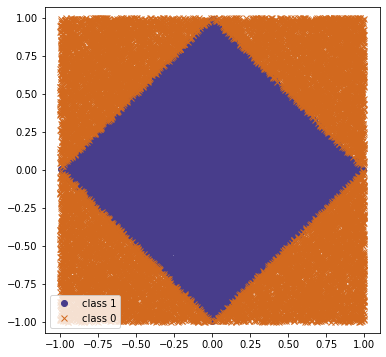

In [12]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

#Español de lo de arriba
#Este código a continuación genera dos valores x y un valor y de acuerdo con diferentes patrones
#También crea un término de "sesgo" (un vector de 1s)
#El objetivo es entonces aprender el mapeo de x a y usando una red neuronal a través de la propagación hacia atrás o backpropagation(usando fordward y loss_fn)

num_obs = 30000
#pendiente e intersecto(entradas)
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
#print(x_mat_1)
#valor de bias
x_mat_bias = np.ones((num_obs,1))
#print(x_mat_bias)
#lista de entradas de pendiente y de intersecto con el valor de bias
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)
#print(x_mat_full)

#Patrones a escoger
# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern (patron de circulo utiliza la formula de una circunferancia)
'''
y =(raiz(x**2+y**2)<0.75)
'''
#y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.7).astype(int)
#print (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75)

# # Diamond Pattern
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
#y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.6).astype(int)

# # Thick Right Angle pattern
#y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
#y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(6, 6))    #Tamaño de la grafica
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'ro', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'bx', label='class 0', color='chocolate')
#ax.grid(True)    #Grilla de la grafica
ax.legend(loc='best')
ax.axis('equal');


In [13]:
x_mat_full

array([[-0.11772917,  0.52014668,  1.        ],
       [ 0.7804142 , -0.54740784,  1.        ],
       [-0.09447754, -0.18477305,  1.        ],
       ...,
       [-0.34473861, -0.91535538,  1.        ],
       [-0.98355975, -0.93148341,  1.        ],
       [-0.60616037,  0.823717  ,  1.        ]])

In [14]:
#Diferentes funciones de Activacion para Backpropagation

#Funcion de Activacion Sigmoide 
def sigmoid(x):
    
    #Sigmoid function
    
    return 1.0 / (1.0 + np.exp(-x))

"""
#Funcion de Activacion Escalonada
def step(x):
    
   #Step function
    
    return np.where(x>0, 1, 0)
"""
  
""" 
#Funcion de Activacion Relu
def relu(x):
    
   #Relu function
    
    return np.where(x>0, x, 0)
"""
"""
#Funcion de Activacion Tangente Hiperbolica
def tanh(x):
    
   #tanh function
    
   return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))
"""

#La siguiente funcion es de perdida la cual calcula de cuanto fue mi desviacion con respecto a la esperada
#Esta funcion se va llamando de acuerdo al numero de iteraciones para ir calculando de cuanto fue mi desviacion con respecto a la esperada
#Por medio de funcion de error para la clasificaccion binaria
def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    #retorna Por medio de funcion de error para la clasificaccion binaria
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)

#Esta funcion me permite reajustar los pesos de acuerdo a un error, por medio del gradiente descendiente y los nuevos valores de predicciones
#esta funcion se va llamando de acuerdo al numero de iteraciones para ir ajustando en cada vuelta la prediccion.
def forward_pass(W1, W2):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` (global variable) and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    global x_mat
    global y
    global num_
    # First, compute the new predictions `y_pred`  (primero calcula el valor de las nuevas predicciones)
    z_2 = np.dot(x_mat, W_1)   #producto punto entre la entrada x_mat y W_1
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)     #producto punto entre la entrada a_2 y W_1
    y_pred = sigmoid(z_3).reshape((len(x_mat),))
    # Now compute the gradient (ahora calcula el gradiente)
    J_z_3_grad = -y + y_pred
    J_W_2_grad = np.dot(J_z_3_grad, a_2)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)
    
    # return
    return y_pred, gradient

#Grafica los valores de perdida Vs la presiciones
def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

iteration 0, log loss is 0.8140, accuracy is 0.4987333333333333
iteration 1000, log loss is 0.5892, accuracy is 0.6211666666666666
iteration 2000, log loss is 0.3880, accuracy is 0.7143333333333334
iteration 3000, log loss is 0.3179, accuracy is 0.7402666666666666
iteration 4000, log loss is 0.3127, accuracy is 0.7431666666666666
iteration 5000, log loss is 0.3103, accuracy is 0.7444
iteration 6000, log loss is 0.3088, accuracy is 0.7454666666666667
iteration 7000, log loss is 0.3078, accuracy is 0.7463
iteration 8000, log loss is 0.3070, accuracy is 0.7467333333333334
iteration 9000, log loss is 0.3064, accuracy is 0.7472333333333333
iteration 10000, log loss is 0.3060, accuracy is 0.7474333333333333
iteration 11000, log loss is 0.3056, accuracy is 0.7476333333333334
iteration 12000, log loss is 0.3052, accuracy is 0.7478333333333333
iteration 13000, log loss is 0.3050, accuracy is 0.748
iteration 14000, log loss is 0.3047, accuracy is 0.7482666666666666
iteration 15000, log loss is 0

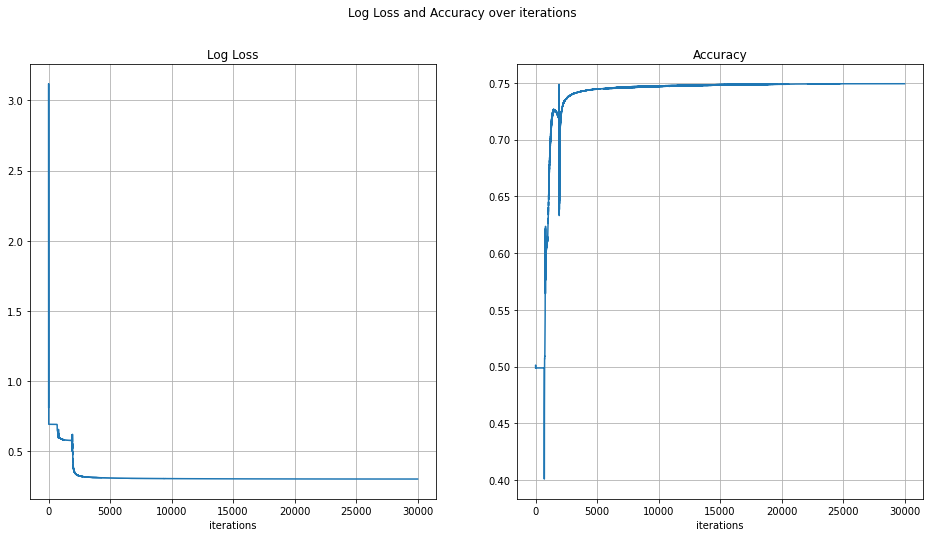

In [18]:
#### Initialize the network parameters  (inicializa los parametros de la red de manera aleatoria)

np.random.seed(1241)

W_1 = np.random.uniform(-1,1,size=(3,4))
W_2 = np.random.uniform(-1,1,size=(4))
#numerode iteraciones y la rata de aprendizaje
num_iter = 30000
learning_rate = .001
x_mat = x_mat_full


loss_vals, accuracies = [], []  #Matrices de valores de perdida y presiciones
for i in range(num_iter):
    ### Do a forward computation, and get the gradient   (Realiza un calculo directo y obtiene el gradiente para cada peso por la funcion forward_pass)
    y_pred, (J_W_1_grad, J_W_2_grad) = forward_pass(W_1, W_2)
    
    ## Update the weight matrices   (actualiza las matrizes de peso)
    W_1 = W_1 - learning_rate*J_W_1_grad 
    W_2 = W_2 - learning_rate*J_W_2_grad
    
    ### Compute the loss and accuracy (calcula la perdida y la presición, va guardando los valores en la matriz correspondiente)
    curr_loss = loss_fn(y,y_pred)
    loss_vals.append(curr_loss)
    acc = np.sum((y_pred>=.5) == y)/num_obs
    accuracies.append(acc)

    ## Print the loss and accuracy for every 200th iteration  (imprima la perdida y la presicion por cada iteracion numero 200)
    if((i%1000) == 0):
        #Formato de como se muestra (iteracion*200,valores de perdida,prediccion por cada valor de perdida)
        print('iteration {}, log loss is {:.4f}, accuracy is {}'.format(
            i, curr_loss, acc
        ))
#Grafica de los valores de perdida y de presicion 
plot_loss_accuracy(loss_vals, accuracies)

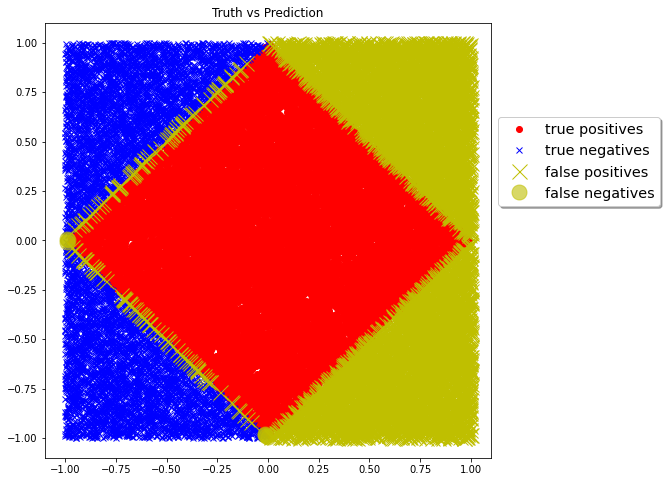

In [17]:
pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions (predicciones verdaderas)
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions  (predicciones falsas)
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');